In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
import os

#### Using fft.dct

In [4]:
from scipy import fft
test = fft.dct([1, 2, 3, 4], 2, norm='ortho') # Use SciPy

In [5]:
test

array([ 5.        , -2.2304425 ,  0.        , -0.15851267])

#### Build 1D-DCT II Function

In [6]:
def dct(data):
    N = len(data)
    f = 0
    cof = np.zeros(N)
    for k in range(N):
        if k==0:
            f = math.sqrt(1/(4*N))
        else:
            f = math.sqrt(1/(2*N))

        s = 0
        for n in range(N):
            out = data[n] * math.cos((math.pi*k) / (2*N) * (2*n+1))
            s = s + out
        cof[k] = 2 * f * s
        
    return np.around(cof, decimals=7)

In [7]:
data = np.array([1,2, 3, 4])
data

array([1, 2, 3, 4])

In [8]:
output = dct(data)
output

array([ 5.       , -2.2304425, -0.       , -0.1585127])

#### Data-1D -> Signal 

In [9]:
data1D = np.random.randint(256, size=1024)
data1D

array([ 79, 211, 130, ..., 103, 132,  74])

In [10]:
N1D = len(data1D)
index1D = np.arange(N1D)
index1D

array([   0,    1,    2, ..., 1021, 1022, 1023])

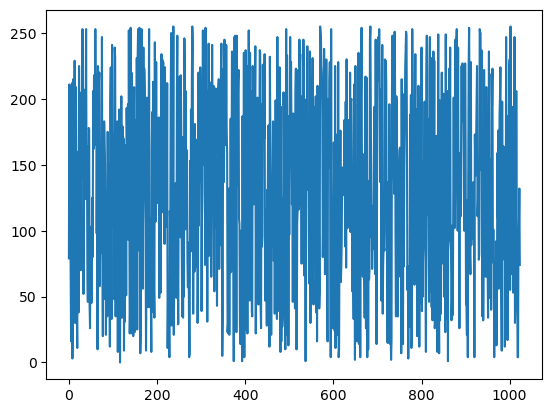

In [11]:
plt.plot(index1D, data1D)

In [12]:
output1D = dct(data1D)
output1D

array([4167.8125   ,   79.6096563,  -61.5489807, ...,   28.9698846,
         57.0664471,  -64.4208763])

In [13]:
o1D = fft.dct(data1D, norm='ortho') # Use SciPy
o1D

array([4167.8125    ,   79.60965629,  -61.5489807 , ...,   28.96988457,
         57.06644709,  -64.42087634])

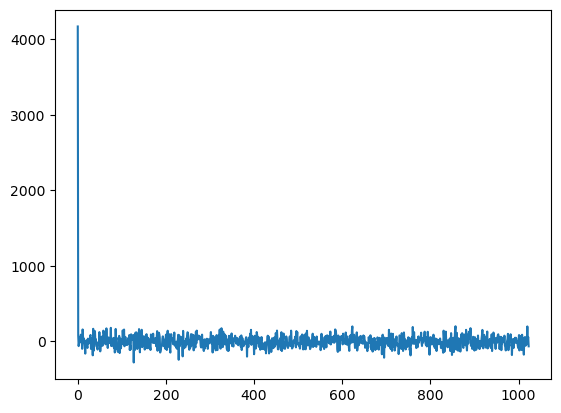

In [14]:
plt.plot(index1D, output1D)

#### Inverse 1D-DCT II Function

In [15]:
def idct(cof):
    N = len(cof)
    data = np.zeros(N)
    for k in range(N):
        s = 0
        for n in range(1, N):
            out = cof[n] * math.cos(math.pi/(2*N)*((2*k)+1)*n)
            s = s + out
        data[k] = (cof[0]/math.sqrt(N)) + (math.sqrt(2/N)*s)
        
    return np.around(data, decimals=7)

In [16]:
output1D_i = idct(output1D)
output1D_i

array([ 79., 211., 130., ..., 103., 132.,  74.])

In [17]:
o1D_i = fft.idct(output1D, norm='ortho') # Use SciPy
o1D_i

array([ 78.99999999, 211.00000001, 130.00000003, ..., 102.99999997,
       131.99999998,  73.99999997])

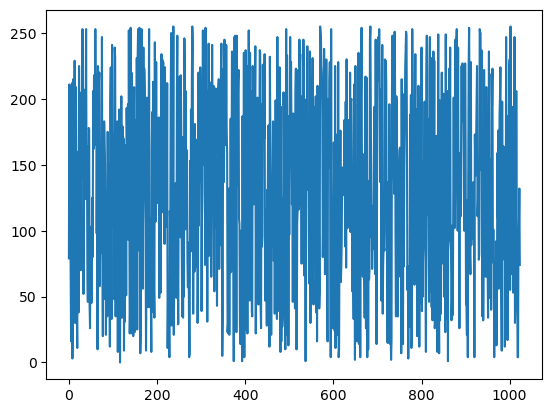

In [18]:
plt.plot(index1D, output1D_i)

In [19]:
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\Lab'

In [20]:
wpath = os.chdir('C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg')
cpath = os.getcwd()
cpath

'C:\\Personal\\Local\\Coding\\Projects\\C++\\DCT\\OriginalImg'

#### Read Grayscale Image

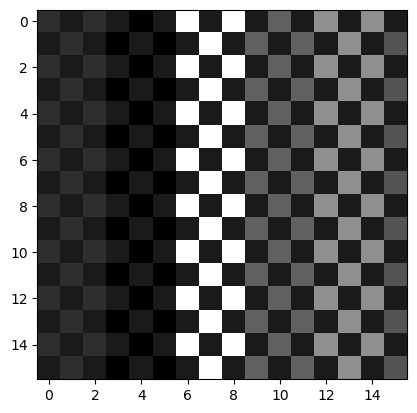

In [21]:
l1 = 'Grayscale'
path = os.path.join(cpath, l1)
imlist = os.listdir(path)
impath = os.path.join(path, imlist[0])

gArr = cv.imread(impath, cv.IMREAD_GRAYSCALE)
plt.imshow(gArr, cmap='gray')

In [22]:
gArr

array([[ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  63,  79, 218,  79, 218,  79, 122,  79, 150,
         79, 150,  79],
       [ 79,  91,  79,  63,  79,  63,  79, 218,  79, 122,  79, 122,  79,
        150,  79, 114],
       [ 91,  79,  91,  79,  6

In [23]:
gArr.shape

(16, 16)

In [24]:
index_dim = np.arange(16)
index_dim

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

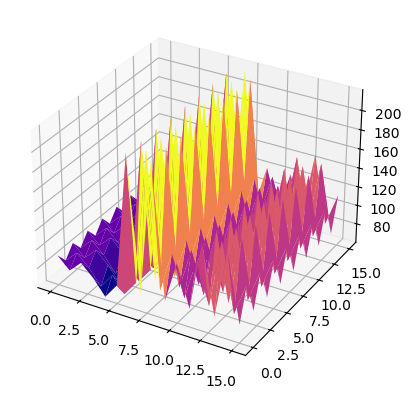

In [25]:
X, Y = np.meshgrid(index_dim, index_dim)
Z = gArr
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z, cmap='plasma', zorder=0)

#### Build 2D-DCT II Function

In [26]:
def dct_2D(data):
    M, N = data.shape
    cof = np.zeros((M, N))
    f1 = 0
    f2 = 0
    PI = math.pi

    for i in range(M):
        for j in range(N):
            if i==0:
                f1 = math.sqrt(1/(4*M))
            else:
                f1 = math.sqrt(1/(2*M))

            if j==0:
                f2 = math.sqrt(1/(4*N))
            else:
                f2 = math.sqrt(1/(2*N))

            s = 0
            for m in range(M):
                for n in range(N):
                    out = data[m][n] * math.cos((2*m+1)*i*PI / (2*M)) * math.cos((2*n+1)*j*PI / (2*N))
                    s = s + out

            cof[i][j] = 4 * f1 * f2 * s
    
    return np.around(cof, decimals=7)

In [27]:
output2D = dct_2D(gArr)
output2D

array([[ 1.65500000e+03, -1.66883051e+02, -1.92546894e+02,
         8.71857240e+00,  2.00690098e+02,  1.25885903e+02,
        -1.71993458e+02, -7.25081298e+01,  1.60000000e+01,
         5.33756808e+01,  2.09814570e+00,  3.85465950e+00,
        -3.55033036e+01, -2.65552917e+01,  2.05314812e+01,
         9.93797711e+01],
       [ 7.10528170e+00,  1.75943950e+00, -5.67712050e+00,
        -1.91841600e+00,  7.66068600e-01,  2.94516620e+00,
         1.42649080e+00,  1.60299350e+00, -6.66120160e+00,
        -5.13250270e+00,  7.65466210e+00,  2.24675326e+01,
        -1.02190941e+01, -1.02052971e+01, -1.41455550e+01,
         3.75700127e+01],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         0.00000000e+00],
       [ 7.38924630e+00,  1.82975600e

In [28]:
o2D = fft.dctn(gArr, norm='ortho') # Use SciPy
o2D

array([[ 1.65500000e+03, -1.66883052e+02, -1.92546894e+02,
         8.71857237e+00,  2.00690098e+02,  1.25885903e+02,
        -1.71993458e+02, -7.25081298e+01,  1.60000000e+01,
         5.33756808e+01,  2.09814570e+00,  3.85465952e+00,
        -3.55033036e+01, -2.65552917e+01,  2.05314812e+01,
         9.93797711e+01],
       [ 7.10528169e+00,  1.75943951e+00, -5.67712049e+00,
        -1.91841597e+00,  7.66068571e-01,  2.94516616e+00,
         1.42649081e+00,  1.60299348e+00, -6.66120158e+00,
        -5.13250269e+00,  7.65466213e+00,  2.24675326e+01,
        -1.02190941e+01, -1.02052971e+01, -1.41455550e+01,
         3.75700127e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.38924628e+00,  1.82975601e

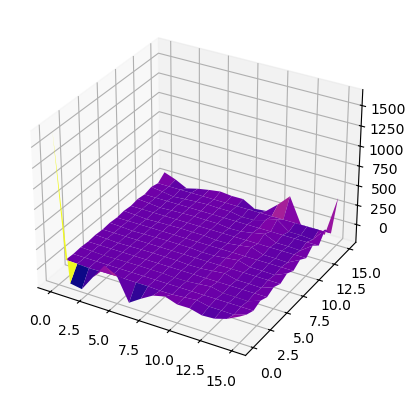

In [29]:
X, Y = np.meshgrid(index_dim, index_dim)
Z_dct2D = output2D
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z_dct2D, cmap='plasma', zorder=0)

#### Inverse 2D-DCT II Function

In [30]:
def idct_2D(cof):
    M, N = cof.shape
    data = np.zeros((M, N))
    PI = math.pi

    for i in range(M):
        for j in range(N):
            s = 0
            for m in range(M):
                for n in range(N):
                    if m == 0:
                        alpha_m = 1 / math.sqrt(M)
                    else:
                        alpha_m = math.sqrt(2 / M)

                    if n == 0:
                        alpha_n = 1 / math.sqrt(N)
                    else:
                        alpha_n = math.sqrt(2 / N)

                    s += cof[m][n] * alpha_m * alpha_n * math.cos(PI / (2 * M) * (2 * i + 1) * m) * math.cos(PI / (2 * N) * (2 * j + 1) * n)

            data[i][j] = s

    return np.around(data, decimals=7)

In [31]:
output2D_i = idct_2D(output2D)
output2D_i

array([[ 91.       ,  79.       ,  91.       ,  79.       ,  63.       ,
         79.       , 218.       ,  79.       , 218.       ,  79.       ,
        122.       ,  79.       , 150.       ,  79.0000001, 150.       ,
         79.       ],
       [ 79.       ,  91.       ,  79.       ,  63.       ,  79.       ,
         63.       ,  79.       , 218.       ,  79.       , 122.       ,
         79.       , 122.       ,  79.       , 150.       ,  79.       ,
        114.       ],
       [ 91.       ,  79.       ,  91.       ,  79.       ,  63.       ,
         79.       , 218.       ,  79.       , 218.       ,  79.       ,
        122.       ,  79.       , 150.       ,  79.       , 150.       ,
         79.       ],
       [ 79.       ,  91.       ,  79.       ,  63.       ,  79.       ,
         63.       ,  79.       , 218.       ,  79.       , 122.       ,
         79.       , 122.       ,  79.       , 150.       ,  79.       ,
        114.       ],
       [ 91.       ,  79.       ,  9

In [32]:
o2D_i = fft.idctn(output2D, norm='ortho') # Use SciPy
o2D_i

array([[ 91.00000003,  78.99999999,  90.99999999,  79.        ,
         63.00000002,  79.00000003, 218.00000002,  78.99999999,
        217.99999999,  78.99999999, 121.99999998,  78.99999997,
        150.00000002,  79.00000006, 150.        ,  78.99999999],
       [ 78.99999999,  91.00000002,  78.99999999,  62.99999996,
         78.99999997,  62.99999999,  79.        , 218.00000001,
         79.00000003, 121.99999998,  79.00000004, 121.99999997,
         78.99999999, 150.00000002,  79.        , 113.99999998],
       [ 91.00000004,  78.99999998,  91.00000001,  79.00000001,
         62.99999998,  79.00000001, 218.00000002,  79.00000003,
        218.00000001,  78.99999997, 122.        ,  79.        ,
        150.00000002,  78.99999998, 150.00000003,  78.99999998],
       [ 79.00000003,  90.99999999,  78.99999999,  62.99999996,
         79.        ,  63.00000002,  79.00000001, 218.00000002,
         79.00000002, 121.99999999,  79.        , 122.00000002,
         79.        , 150.        ,  

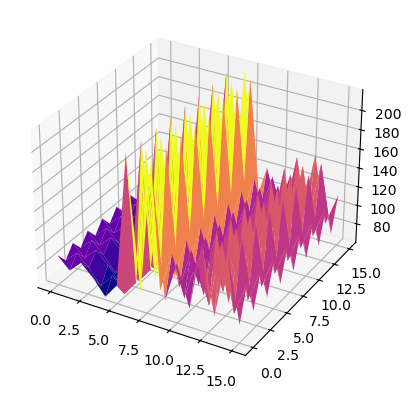

In [33]:
X, Y = np.meshgrid(index_dim, index_dim)
Z_idct2D = output2D_i
ax = plt.subplot(projection='3d', computed_zorder=False)
ax.plot_surface(X, Y, Z_idct2D, cmap='plasma', zorder=0)

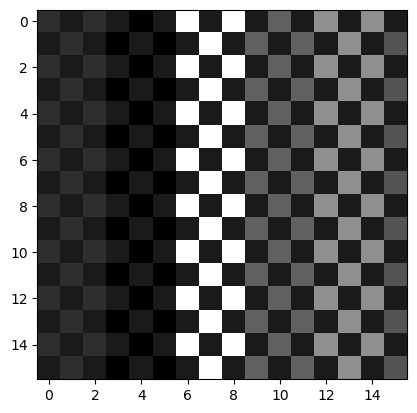

In [38]:
plt.imshow(output2D_i, cmap='gray')